In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
users=pd.read_csv(r"C:\Users\Prabhu\Adapted users\takehome_users.csv", encoding='latin')
engagement=pd.read_csv(r"C:\Users\Prabhu\Adapted users\takehome_user_engagement.csv")
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [6]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


207917 times the customer has visited.

In [7]:
# finding unique visitors

unique_users=len(engagement['user_id'].unique())
print("unique visitors :",unique_users)

unique visitors : 8823


In [8]:
# users with 3 logins
three_logins = engagement.groupby('user_id').filter(lambda x: len(x) >=3)
unique_three_logins=len(three_logins['user_id'].unique())

print("users with 3 logins :",unique_three_logins)        

users with 3 logins : 2248


out of 207917 , 8823 customer are unique users whos has visited

users with 3 logins- 2248

In [9]:

three_logins.reset_index(drop=True, inplace = True)

# Finding how many of the 2248 unique three-logins users are adopted users 
# who have logged in three separate times in at least one 7 day period 


adopted_users = []
for i in range(len(three_logins)-2):
    count=0
    user = three_logins['user_id'][i]
    if user not in adopted_users:
    # Get start date 
        sd = pd.Timestamp(three_logins['time_stamp'][i])
        # 7 days period end date
        ed = sd + pd.Timedelta('6D')
        date_range=pd.date_range(start=sd, end=ed)
        for j in range(3):
            if three_logins['time_stamp'][i+j] in date_range:
                count=count+1
        if count >=3:
            adopted_users.append(user)

print(" Total Adopted users:",len(adopted_users))
            

 Total Adopted users: 1602


In [11]:
# creating adapted users column in users Data

df_adopted_users=np.arange(len(users))

for i in range(len(users)):
    if users['object_id'][i] in adopted_users:
        df_adopted_users[i]=1
    else:
        df_adopted_users[i]=0
    


In [12]:
# adding adapted users in df_users dataframe

df_adopted_users=pd.DataFrame(df_adopted_users,columns=['adopted_users'])
df_users=pd.concat([users,df_adopted_users], axis=1)


In [13]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [14]:
# creating a column for users who were invited by others
invited=np.arange(len(df_users))

for i in range(len(df_users)):
    if df_users['invited_by_user_id'][i] >0:
        invited[i] = 1
        
    else:
        invited[i]=0


In [15]:
df_invited=pd.DataFrame(invited,columns=['invited'])
df_users=pd.concat([df_users,df_invited], axis=1)

In [16]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,1


# Model Building

In [17]:
# we check the the scource of account creation (categorical Data)

df_users['creation_source'].value_counts()


ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [18]:
# we convert the catagorical value into numerical value using label encoder

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(['ORG_INVITE','GUEST_INVITE','PERSONAL_PROJECTS','SIGNUP','SIGNUP_GOOGLE_AUTH'] )

LabelEncoder()

In [19]:
source=le.transform(df_users['creation_source'])

In [20]:
df_source=pd.DataFrame(source,columns=['source'])
df_users=pd.concat([df_users,df_source],axis=1)

In [21]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users,invited,source
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,1,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,1,0


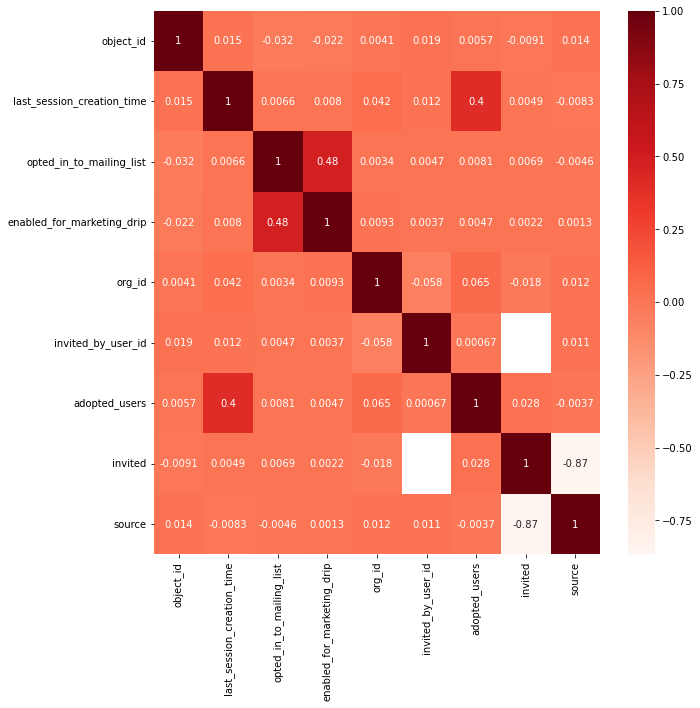

In [23]:
plt.figure(figsize=(10,10))
correlation=df_users.corr()
sns.heatmap(correlation,annot=True,cmap='Reds')
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x=df_users[['source','last_session_creation_time','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited']]
y=df_users['adopted_users']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x.fillna(0), y, test_size=0.2, random_state=42)

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8754166666666666


In [27]:
x.columns

Index(['source', 'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited'],
      dtype='object')

In [28]:
# finding the features which influence the future user adoption

feature_imp = pd.DataFrame(dtc.feature_importances_,index=x.columns,columns=['Value'])
feature_imp.sort_values(by = 'Value' , ascending = False)

,Value
last_session_creation_time,0.755470
org_id,0.179476
source,0.029440
enabled_for_marketing_drip,0.014855
opted_in_to_mailing_list,0.013766
invited,0.006994


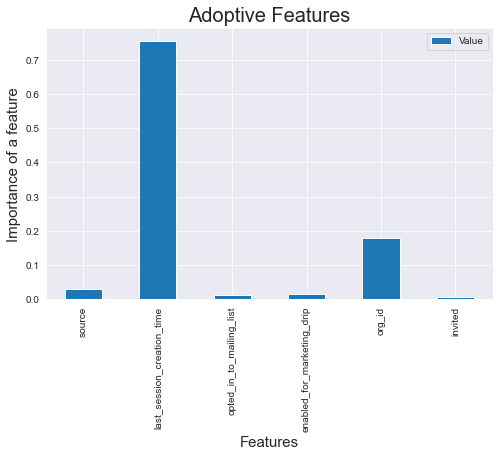

In [30]:
# Adaptive Features bar graph
sns.set_style("darkgrid")
feature_imp.plot.bar(figsize=(8,5))
plt.xlabel('Features',fontsize=15)
plt.ylabel('Importance of a feature',fontsize=15)
plt.title('Adoptive Features',fontsize=20)
plt.show()

# Summary

The objective of the model is to predict the features which determain wheather the visitor will be regular adoptive user/visiter.

207917 times the customer has visited the product. 
out of 207917 visitors , 8823 customer are unique users whos has visited.
users with 3 logins is  2248

The visitors data is  classified into adoptive user and not adotive user. Then added this feature in our dataset which is our actual objective.

Account creation feature in our data is categorical Data, so we have used "LabelEncoder()" to convert it into numerical data.

Correlation between the features is shown in heatmap.

Decision Tree algritham is used to find the important features. Therefor the data is splited into training and test dataset.

The model is able to predict the adoptive user/visiter with 88% accuracy.

The Important features is ploted in the bar garph.

The most important features to predict the adoptive user is  1."last_session_creation_time"    and 2."org_id"


